In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px


from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [3]:
pre_data = pd.read_csv("arquivos/oasis_cross-sectional.csv")

In [15]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436 entries, 0 to 435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      436 non-null    object 
 1   M/F     436 non-null    object 
 2   Hand    436 non-null    object 
 3   Age     436 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    436 non-null    int64  
 9   nWBV    436 non-null    float64
 10  ASF     436 non-null    float64
 11  Delay   20 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 41.0+ KB


In [3]:
pre_data.isna().sum()

ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64

<Axes: >

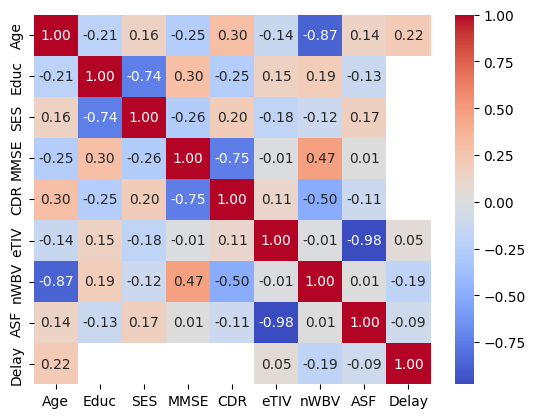

In [4]:
correlation_matrix = pre_data.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

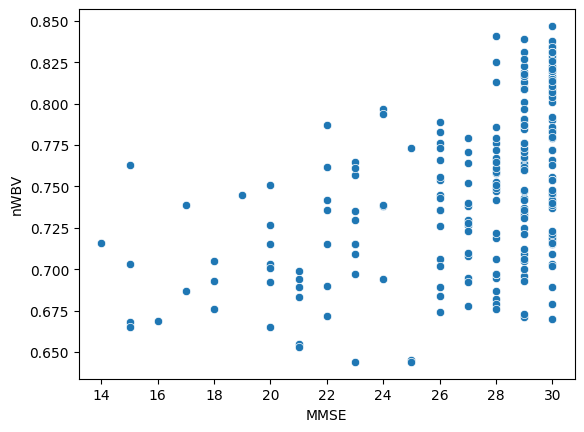

In [5]:
sns.scatterplot(x=pre_data['MMSE'], y = pre_data['nWBV'])
plt.show()

## Cálculos MMSE

queremos prencher os valores de MMSE

Temos inicialmente duas opções:

- MMSE ~ mean(MMSE)
- MMSE ~ Educ + nWBV

In [6]:
calculos_MMSE = pre_data[["Educ","nWBV" ,'MMSE']].copy()
calculos_MMSE.dropna(inplace=True)
calculos_MMSE.reset_index(drop=True, inplace=True)

calculos_MMSE['media'] = calculos_MMSE.MMSE.mean()

In [8]:
mse = mean_squared_error(calculos_MMSE['MMSE'], calculos_MMSE['media'])
mae = mean_absolute_error(calculos_MMSE['MMSE'], calculos_MMSE['media'])

rmse = np.sqrt(mse)

print(f"Raiz Quadrada do Erro Quadrático Médio (RMSE): {rmse}")
print(f"Erro Absoluto Médio (MAE): {mae}")

Raiz Quadrada do Erro Quadrático Médio (RMSE): 3.688996030861034
Erro Absoluto Médio (MAE): 2.8121321865097335


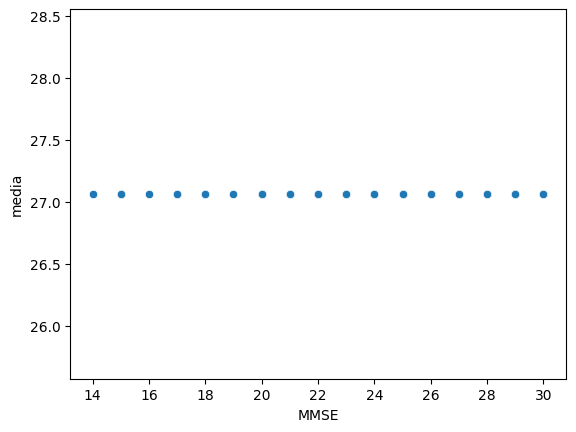

In [10]:
sns.scatterplot(x = calculos_MMSE['MMSE'],y = calculos_MMSE['media'])
plt.show()

In [49]:
calculos_MMSE['mediana'] = calculos_MMSE.MMSE.median()

mse = mean_squared_error(calculos_MMSE['MMSE'], calculos_MMSE['mediana'])
mae = mean_absolute_error(calculos_MMSE['MMSE'], calculos_MMSE['mediana'])

rmse = np.sqrt(mse)

print(f"Raiz Quadrada do Erro Quadrático Médio (RMSE): {rmse}")
print(f"Erro Absoluto Médio (MAE): {mae}")

Raiz Quadrada do Erro Quadrático Médio (RMSE): 4.166226927150109
Erro Absoluto Médio (MAE): 2.523404255319149


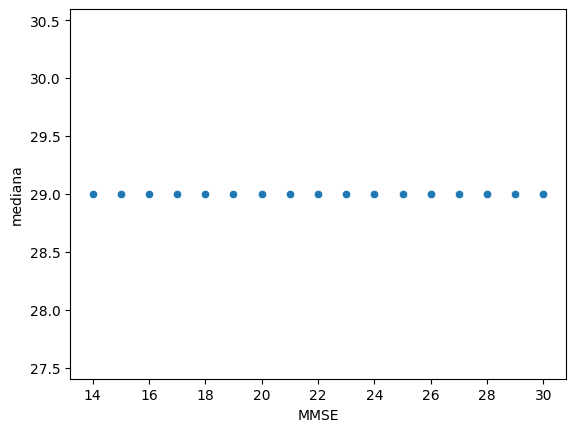

In [50]:
sns.scatterplot(x = calculos_MMSE['MMSE'],y = calculos_MMSE['mediana'])
plt.show()

In [11]:
# Definir as variáveis independentes e dependente
X = calculos_MMSE[['Educ', 'nWBV']]
y = calculos_MMSE['MMSE']

# Ajustar o modelo de regressão linear
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

predictions = model.predict(X)

# Calcular o R²
r2 = r2_score(y, predictions)

# Calcular o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y, predictions)

mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f"R²: {r2}")
print(f"Erro Médio Absoluto (MAE): {mae}")
print(f"Raiz Quadrada do Erro Quadrático Médio (RMSE): {rmse}")


R²: 0.26454517542045586
Erro Médio Absoluto (MAE): 2.3365938113325653
Raiz Quadrada do Erro Quadrático Médio (RMSE): 3.16363366693008


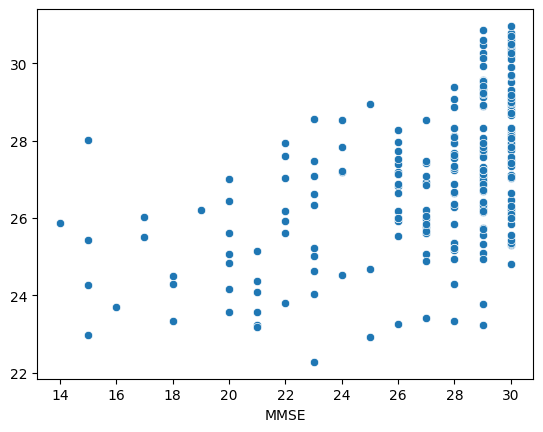

In [48]:
sns.scatterplot(x = y, y = predictions)
plt.show()

## Calculos CDR

In [83]:
calculos_CDR = pre_data[["Educ","nWBV" ,'CDR']].copy()
calculos_CDR.dropna(inplace=True)
calculos_CDR.reset_index(drop=True, inplace=True)


# Dados a usar

In [13]:
def load_data():
    data = pd.read_csv('arquivos/oasis_cross-sectional.csv')
    # Filtrar os dados onde MMSE e CDR não são nulos
    data = data.dropna(subset=['MMSE', 'CDR'])
    return data

data = load_data()

In [14]:
data.drop('Delay', axis=1, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 235 entries, 0 to 415
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      235 non-null    object 
 1   M/F     235 non-null    object 
 2   Hand    235 non-null    object 
 3   Age     235 non-null    int64  
 4   Educ    235 non-null    float64
 5   SES     216 non-null    float64
 6   MMSE    235 non-null    float64
 7   CDR     235 non-null    float64
 8   eTIV    235 non-null    int64  
 9   nWBV    235 non-null    float64
 10  ASF     235 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 22.0+ KB


In [16]:
data.describe()

,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,235.000000,235.000000,216.000000,235.00000,235.000000,235.000000,235.000000,235.000000
mean,72.344681,3.178723,2.490741,27.06383,0.285106,1459.497872,0.749132,1.216511
std,12.091369,1.311510,1.120593,3.69687,0.383405,160.368070,0.047906,0.129427
min,33.000000,1.000000,1.000000,14.00000,0.000000,1123.000000,0.644000,0.881000
25%,66.000000,2.000000,2.000000,26.00000,0.000000,1348.000000,0.713500,1.133500
50%,73.000000,3.000000,2.000000,29.00000,0.000000,1447.000000,0.747000,1.213000
75%,81.000000,4.000000,3.000000,30.00000,0.500000,1548.000000,0.784000,1.302000
max,96.000000,5.000000,5.000000,30.00000,2.000000,1992.000000,0.847000,1.563000


In [13]:
data.to_csv("dados.csv", index=False)

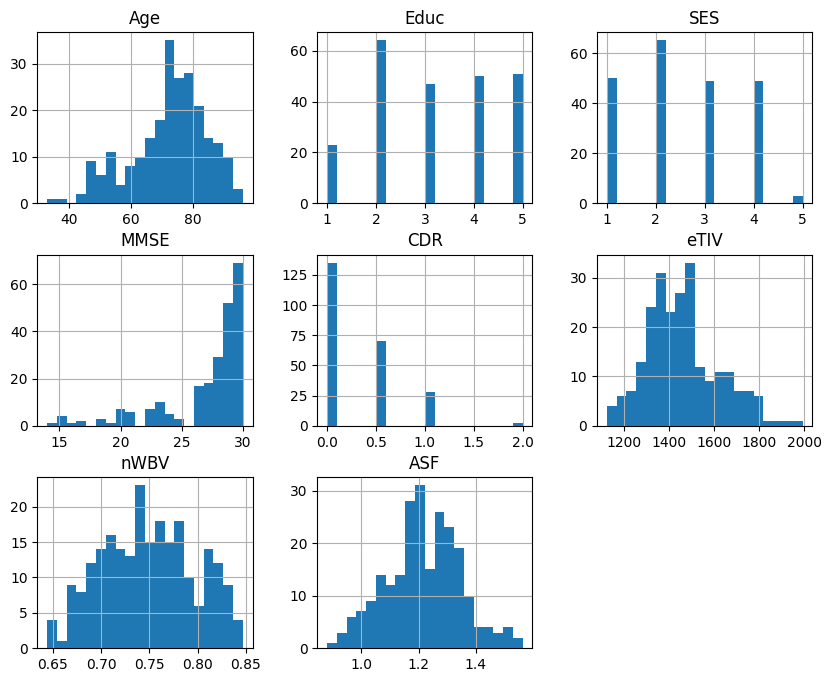

In [17]:
data.hist(figsize=(10, 8), bins=20)
plt.show()

In [24]:
cdr_table = data.groupby(['CDR']).size().reset_index(name='Count')
cdr_table

,CDR,Count
0,0.0,135
1,0.5,70
2,1.0,28
3,2.0,2


In [ ]:
cdr_descricao = {
    0.0: 'Sem demência',
    0.5: 'Demência muito leve',
    1.0: 'Demência leve',
    2.0: 'Demência moderada'
}

cdr_table = data.groupby(['CDR']).size().reset_index(name='Count')

# Substituir os valores da coluna CDR
cdr_table['CDR'] = cdr_table['CDR'].map(cdr_descricao)

# Renomear a coluna 'Count' para 'Contagem'
cdr_table = cdr_table.rename(columns={'Count': 'Contagem'})

cdr_table.reset_index(drop=True, inplace=True)

print(cdr_table)

                   CDR  Contagem
0         Sem demência       135
1  Demência muito leve        70
2        Demência leve        28
3    Demência moderada         2


In [32]:
com_demencia = data.loc[data['CDR'] > 0]

com_demencia 

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Age_Range
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,71-80
13,OAS1_0015_MR1,M,R,76,2.0,NaN,28.0,0.5,1738,0.719,1.010,71-80
14,OAS1_0016_MR1,M,R,82,2.0,4.0,27.0,0.5,1477,0.739,1.188,81-90
19,OAS1_0021_MR1,F,R,80,3.0,3.0,23.0,0.5,1794,0.765,0.978,71-80
20,OAS1_0022_MR1,F,R,69,2.0,4.0,23.0,0.5,1447,0.757,1.213,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...
405,OAS1_0447_MR1,F,R,92,4.0,1.0,24.0,0.5,1388,0.739,1.264,91-100
409,OAS1_0451_MR1,M,R,73,5.0,3.0,27.0,0.5,1687,0.728,1.040,71-80
410,OAS1_0452_MR1,M,R,75,1.0,4.0,22.0,1.0,1656,0.762,1.060,71-80
411,OAS1_0453_MR1,F,R,70,1.0,4.0,29.0,0.5,1295,0.748,1.355,61-70


In [33]:
colunas_de_interese = ["Age_Range", "M/F", "Hand", "Age", "Educ", "SES", "MMSE", "nWBV", "eTIV","ASF", "CDR"]

In [34]:
com_demencia = com_demencia[colunas_de_interese]

In [35]:
com_demencia

,Age_Range,M/F,Hand,Age,Educ,SES,MMSE,nWBV,eTIV,ASF,CDR
2,71-80,F,R,73,4.0,3.0,27.0,0.708,1454,1.207,0.5
13,71-80,M,R,76,2.0,NaN,28.0,0.719,1738,1.010,0.5
14,81-90,M,R,82,2.0,4.0,27.0,0.739,1477,1.188,0.5
19,71-80,F,R,80,3.0,3.0,23.0,0.765,1794,0.978,0.5
20,61-70,F,R,69,2.0,4.0,23.0,0.757,1447,1.213,0.5
...,...,...,...,...,...,...,...,...,...,...,...
405,91-100,F,R,92,4.0,1.0,24.0,0.739,1388,1.264,0.5
409,71-80,M,R,73,5.0,3.0,27.0,0.728,1687,1.040,0.5
410,71-80,M,R,75,1.0,4.0,22.0,0.762,1656,1.060,1.0
411,61-70,F,R,70,1.0,4.0,29.0,0.748,1295,1.355,0.5


## CDR vs Age

In [ ]:
bins_age = [30, 40, 50, 60, 70, 80, 90, 100]
labels_age = ['30-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

data['Age_Range'] = pd.cut(data['Age'], bins=bins_age, labels=labels_age)

# Tabela para CDR por intervalo de idade
cdr_age_table = data.groupby(['Age_Range', 'CDR'], observed=True).size().reset_index(name='Count')

cdr_age_table  = cdr_age_table.pivot(index='Age_Range', columns='CDR', values='Count').fillna(0)

cdr_age_table


CDR,0.0,0.5,1.0,2.0
Age_Range,,,,
30-40,2.0,0.0,0.0,0.0
41-50,14.0,0.0,0.0,0.0
51-60,23.0,0.0,0.0,0.0
61-70,26.0,16.0,3.0,0.0
71-80,38.0,34.0,17.0,1.0
81-90,29.0,18.0,7.0,1.0
91-100,3.0,2.0,1.0,0.0


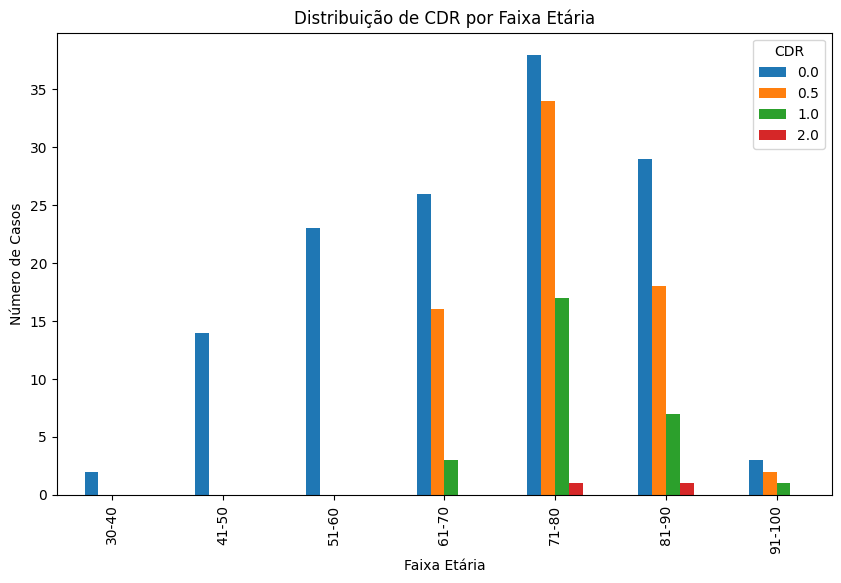

In [61]:
# Gráfico de barras agrupadas
cdr_age_table.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de CDR por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Casos')
plt.legend(title='CDR')
plt.show()

## CDR vs MMSE

In [43]:
fig = px.box(data, y="MMSE", x='CDR', color='CDR', title=f'Box Plot of MMSE by Clinical Dementia Rating (CDR)')
fig.update_layout(xaxis_title='CDR', yaxis_title="MMSE")
fig.show()

In [47]:
media_mmse_por_cdr = data.groupby('CDR')['MMSE'].mean().reset_index(name='MMSE médio')
media_mmse_por_cdr

,CDR,MMSE médio
0,0.0,29.096296
1,0.5,25.642857
2,1.0,21.678571
3,2.0,15.000000


## CDR vs nWBV

In [44]:
fig = px.box(data, y="nWBV", x='CDR', color='CDR', title=f'Box Plot of nWBV by Clinical Dementia Rating (CDR)')
fig.update_layout(xaxis_title='CDR', yaxis_title="nWBV")
fig.show()

In [46]:
media_mmse_por_cdr = data.groupby('CDR')['nWBV'].mean().reset_index(name='nWBV médio')
media_mmse_por_cdr

,CDR,nWBV médio
0,0.0,0.769230
1,0.5,0.729414
2,1.0,0.706179
3,2.0,0.684000


In [53]:
# Criando o histograma com gráficos separados para cada CDR
fig = px.histogram(
    data, 
    x="nWBV", 
    color='CDR', 
    facet_col='CDR', 
    title="Histograma de nWBV por Clinical Dementia Rating (CDR)"
)

# Ajustando os títulos e layout do gráfico
fig.update_layout(
    xaxis_title='nWBV',
    yaxis_title='Contagem',
    showlegend=False
)
fig.show()

## CDR vs Educ


In [65]:
# Tabela para CDR por Educ
cdr_educ_table = data.groupby(['Educ', 'CDR']).size().reset_index(name='Count')

cdr_educ_table  = cdr_educ_table.pivot(index='Educ', columns='CDR', values='Count').fillna(0)


cdr_educ_table

CDR,0.0,0.5,1.0,2.0
Educ,,,,
1.0,8.0,8.0,6.0,1.0
2.0,29.0,24.0,11.0,0.0
3.0,30.0,13.0,3.0,1.0
4.0,31.0,14.0,5.0,0.0
5.0,37.0,11.0,3.0,0.0


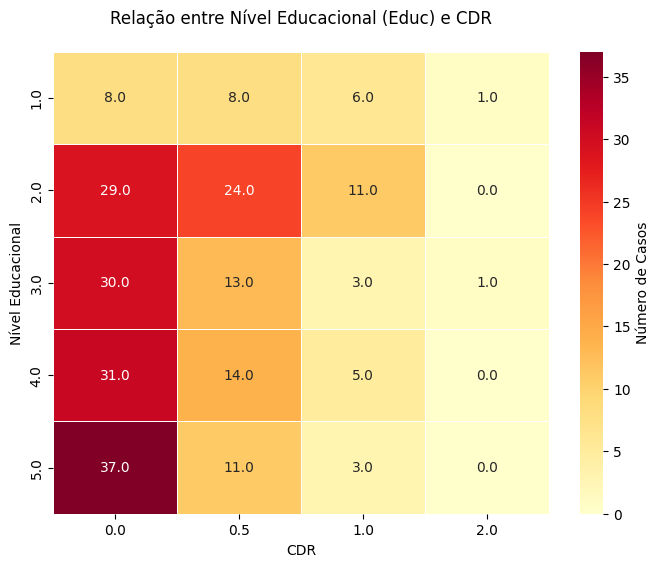

In [66]:
# Gerar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cdr_educ_table, 
    annot=True,  # Mostrar valores nas células
    fmt=".1f",   # Formato decimal
    cmap="YlOrRd",  # Cores (amarelo-laranja-vermelho)
    linewidths=0.5,
    cbar_kws={'label': 'Número de Casos'}
)
plt.title("Relação entre Nível Educacional (Educ) e CDR", pad=20)
plt.xlabel("CDR")
plt.ylabel("Nível Educacional")
plt.show()

In [73]:
data_dem = data.loc[data["CDR"] > 0]

cdr_educ_table_dem = data_dem.groupby(['Educ', 'CDR']).size().reset_index(name='Count')

cdr_educ_table_dem  = cdr_educ_table_dem.pivot(index='Educ', columns='CDR', values='Count').fillna(0)


cdr_educ_table_dem

CDR,0.5,1.0,2.0
Educ,,,
1.0,8.0,6.0,1.0
2.0,24.0,11.0,0.0
3.0,13.0,3.0,1.0
4.0,14.0,5.0,0.0
5.0,11.0,3.0,0.0


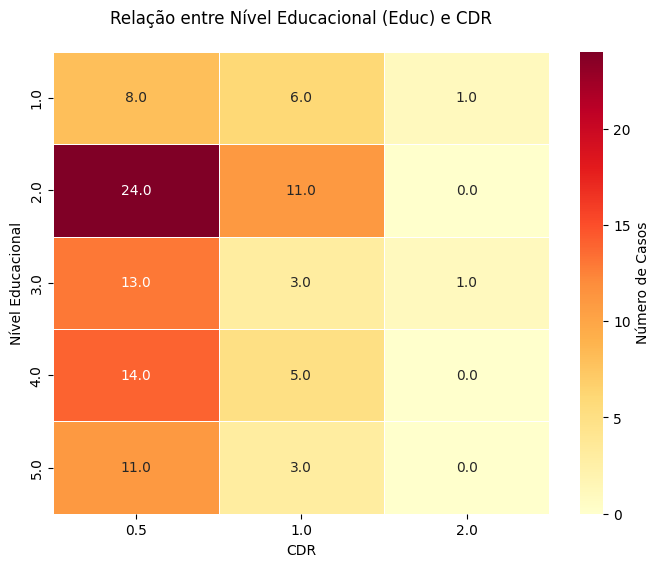

In [74]:
# Gerar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    cdr_educ_table_dem, 
    annot=True,  # Mostrar valores nas células
    fmt=".1f",   # Formato decimal
    cmap="YlOrRd",  # Cores (amarelo-laranja-vermelho)
    linewidths=0.5,
    cbar_kws={'label': 'Número de Casos'}
)
plt.title("Relação entre Nível Educacional (Educ) e CDR", pad=20)
plt.xlabel("CDR")
plt.ylabel("Nível Educacional")
plt.show()

In [76]:
import plotly.graph_objects as go

In [79]:
cdr_educ_table_dem.index

Index([1.0, 2.0, 3.0, 4.0, 5.0], dtype='float64', name='Educ')

In [82]:
fig = go.Figure(data=go.Heatmap(
    z=cdr_educ_table_dem.values,                   # Valores da matriz
    x=cdr_educ_table_dem.columns.astype(str),      # Eixo X: CDR (convertido para string)
    y=cdr_educ_table_dem.index.astype(str),        # Eixo Y: Educ (convertido para string)
    colorscale='Viridis',          # Escala de cores (pode ser "Plasma", "Inferno", etc.)
    hoverongaps=False,
    text=cdr_educ_table_dem.values,                # Texto exibido no hover
    hovertemplate='Educ: %{y}<br>CDR: %{x}<br>Casos: %{z}<extra></extra>',
    colorbar=dict(title='Número de Casos')
))

fig.update_layout(
    title='Relação entre Nível Educacional (Educ) e CDR',
    xaxis=dict(title='CDR', side='bottom'),
    yaxis=dict(title='Nível Educacional'),
    width=600, height=500,
    margin=dict(l=50, r=50, b=50, t=50)
)

fig.show()

